# LAB | Central Limit Theorem and Normality Tests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Set random seed for reproducibility
np.random.seed(42)

# Setting plot style
plt.style.use('seaborn-v0_8')

## Challenge 1: Basic Central Limit Theorem Demonstration

In this challenge, you'll explore the fundamental concept of the Central Limit Theorem
by generating samples from different distributions and observing how their sample means
approach a normal distribution as sample size increases.

# Instructions
Instructions:
1. We'll create a non-normal distribution (exponential distribution)
2. Draw samples of different sizes and calculate their means
3. Observe how the distribution of sample means approaches normal distribution
4. Complete the code below to create histograms for sample means


In [2]:
# Set parameters
population_size = 10000
sample_sizes = [1, 5, 30, 100]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

# Create a non-normal population (exponential distribution with lambda=0.5)
population = np.random.exponential(scale=2, size=population_size)

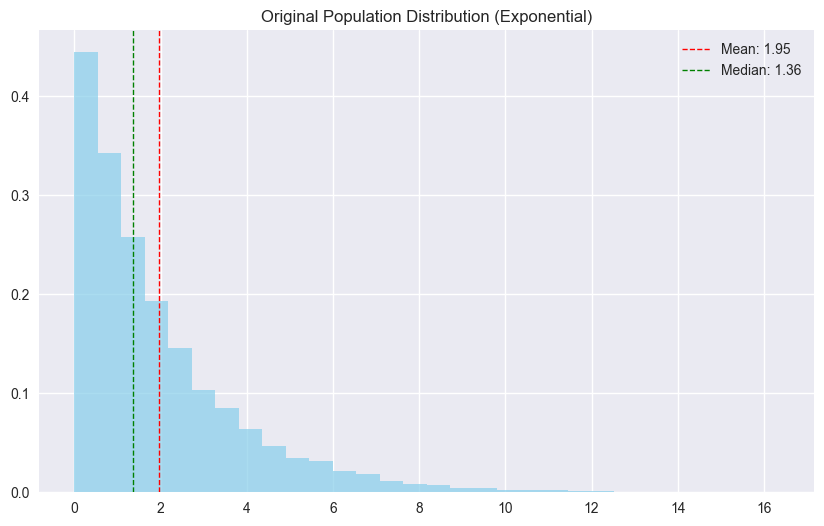

Population statistics:
Mean: 1.9550
Median: 1.3566
Variance: 3.7975
Skewness: 1.9190
Kurtosis: 5.1151



In [3]:
# Plot the original population distribution
plt.figure(figsize=(10, 6))
plt.hist(population, bins=30, alpha=0.7, color='skyblue', density=True)
plt.title('Original Population Distribution (Exponential)')
plt.axvline(np.mean(population), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(population):.2f}')
plt.axvline(np.median(population), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(population):.2f}')
plt.legend()
plt.show()

print(f"Population statistics:")
print(f"Mean: {np.mean(population):.4f}")
print(f"Median: {np.median(population):.4f}")
print(f"Variance: {np.var(population):.4f}")
print(f"Skewness: {stats.skew(population):.4f}")
print(f"Kurtosis: {stats.kurtosis(population):.4f}\n")

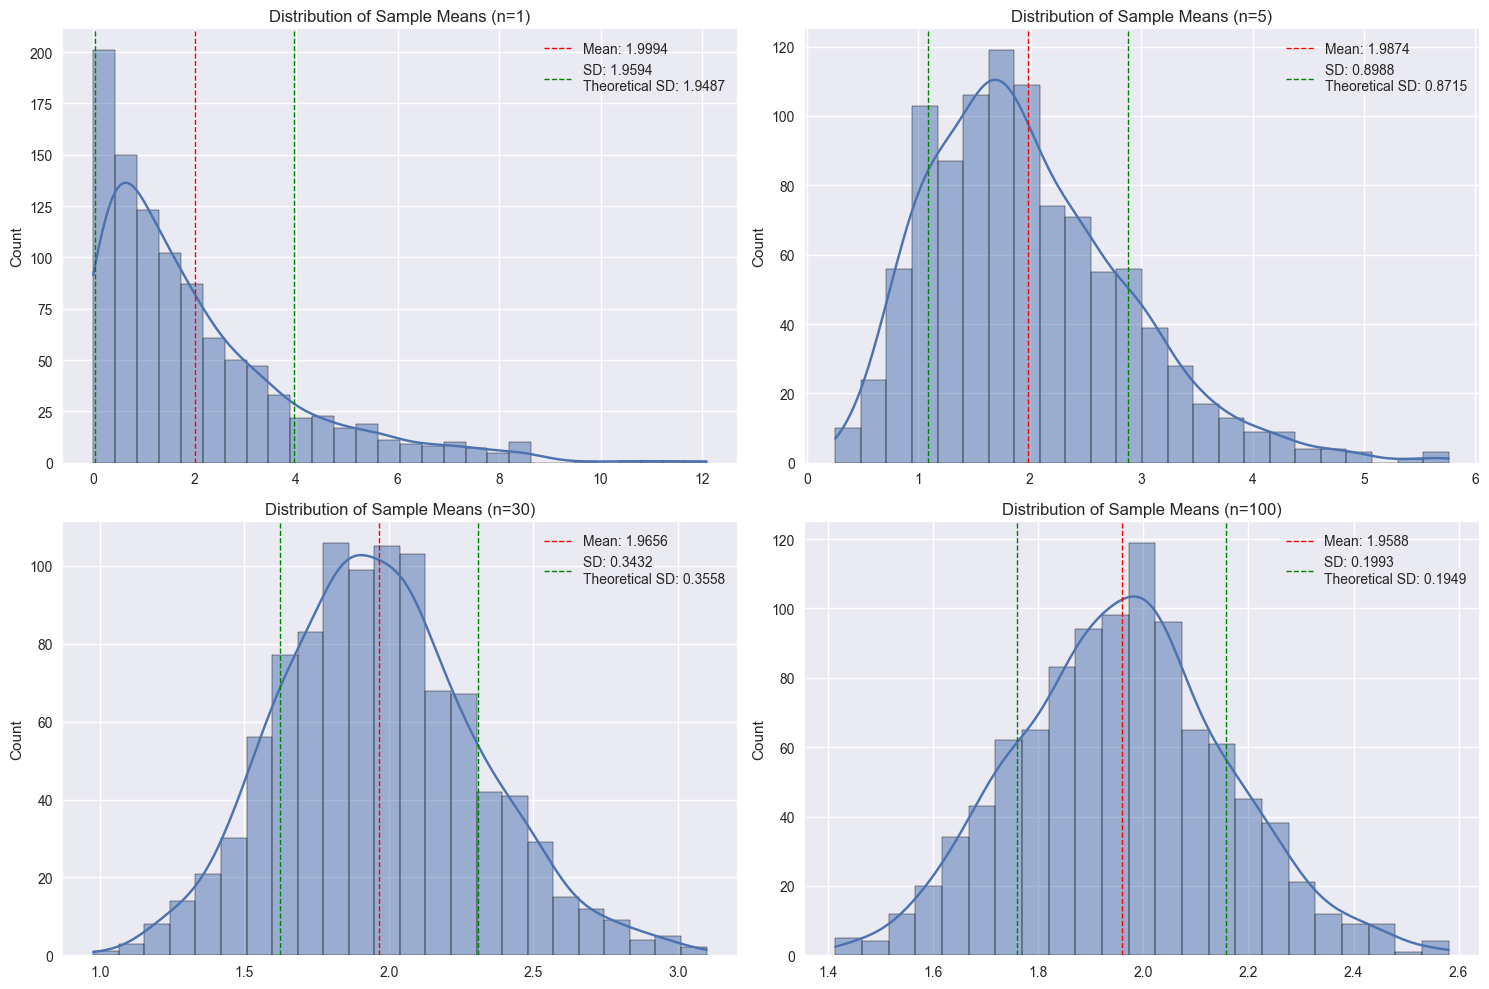

In [4]:
# Show how sample means approach normal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) for _ in range(n_samples)])
    
    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])
    
    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)
    
    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, 
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

Your Tasks:
1. Explain what happens to the distribution of sample means as sample size increases
2. Compare the observed standard deviation of sample means with the theoretical value
3. What is the theoretical SD formula according to the CLT?
4. How does the skewness of the distribution of sample means change with sample size?

### 1. What happens to the distribution of sample means as sample size increases?

As sample size increases, the sample means start to look more like a normal distribution. At first (sample size = 1 or 5), the shape is still skewed, but by 30 or 100, it becomes more bell-shaped.

---

### 2. Compare the observed standard deviation of sample means with the theoretical value

The observed standard deviation gets closer to the theoretical one as sample size increases. The formula used is:

SD = population std / sqrt(sample size)


They’re pretty close in all the plots.

---

### 3. What is the theoretical SD formula according to the CLT?

Theoretical SD = σ / √n

(σ = population standard deviation, n = sample size)

---

### 4. How does the skewness of the distribution of sample means change with sample size?

Skewness goes down as sample size goes up. Small samples still look skewed, but large ones are more symmetric and normal.

## Challenge 2: CLT with Real-World Data


Now let's apply the Central Limit Theorem to a real-world dataset.
We'll use the famous Iris dataset.


In [6]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
# Preview of the Iris dataset:
display(iris_df.head())
# Summary statistics:
print(iris_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


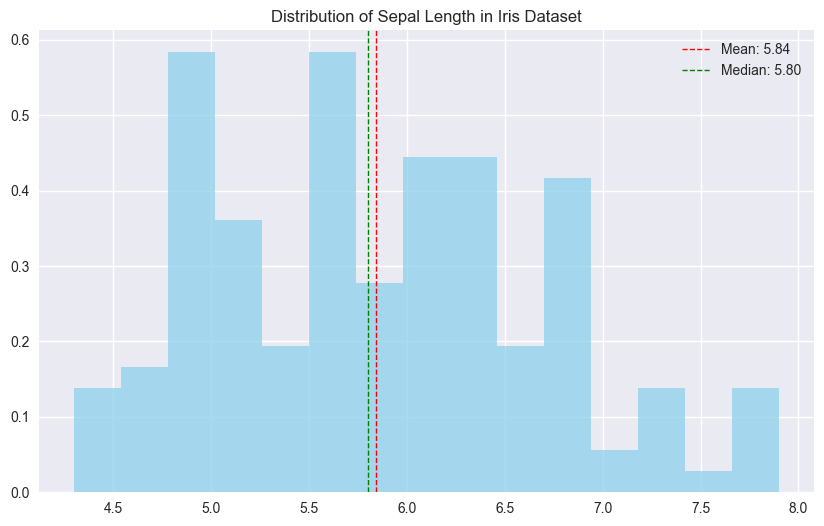

In [8]:
# Let's focus on sepal length for this exercise
sepal_length = iris_df['sepal length (cm)'].values

# Plot the original distribution
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=15, alpha=0.7, color='skyblue', density=True)
plt.title('Distribution of Sepal Length in Iris Dataset')
plt.axvline(np.mean(sepal_length), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sepal_length):.2f}')
plt.axvline(np.median(sepal_length), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(sepal_length):.2f}')
plt.legend()
plt.show()

Your Tasks:
1. Complete the following code to draw samples of sepal length and compute their means
2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30
3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means
4. Test if the original data is normally distributed (using a method of your choice)

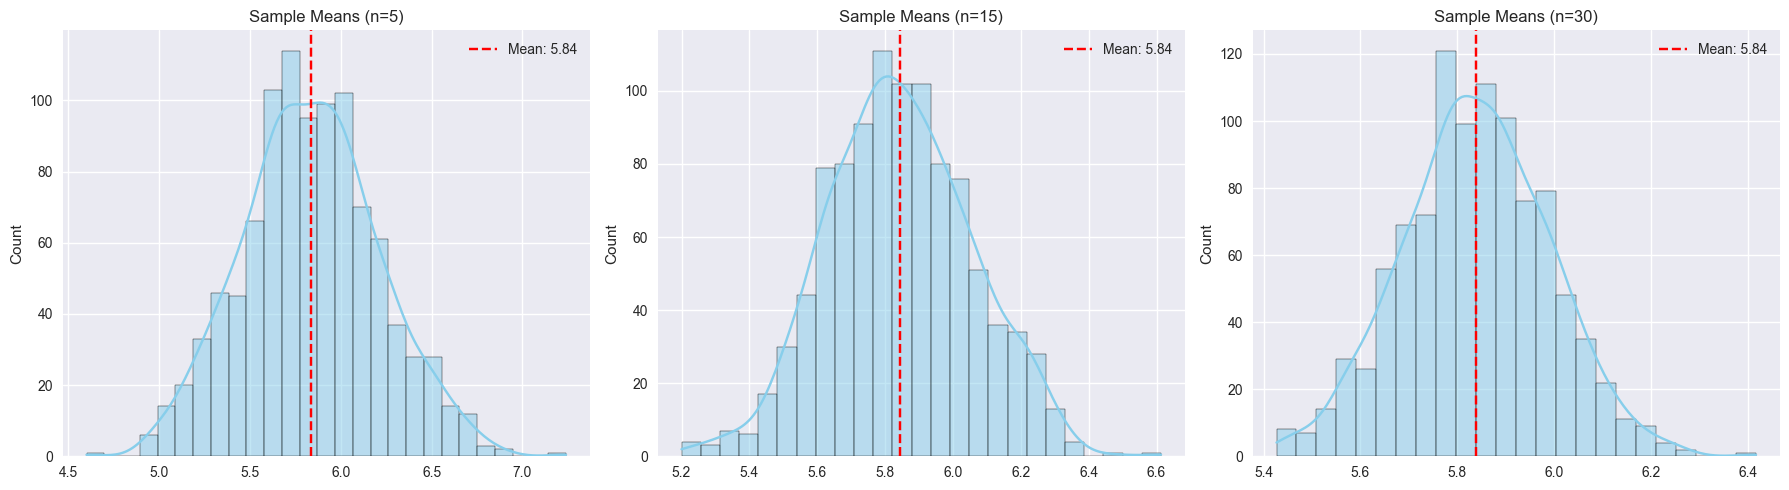

In [9]:
sample_sizes = [5, 15, 30]
n_samples = 1000

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Step 1: Draw 1000 samples and compute their means
    sample_means = np.array([
        np.mean(np.random.choice(sepal_length, size=sample_size, replace=True))
        for _ in range(n_samples)
    ])
    
    # Step 2: Plot histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Sample Means (n={sample_size})')
    axes[i].axvline(np.mean(sample_means), color='red', linestyle='--', label=f'Mean: {np.mean(sample_means):.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [10]:
original_std = np.std(sepal_length)
print(f"Original data std: {original_std:.4f}")

for size in sample_sizes:
    means = np.array([
        np.mean(np.random.choice(sepal_length, size=size, replace=True))
        for _ in range(n_samples)
    ])
    print(f"Sample size {size} - Sample means std: {np.std(means):.4f} (Expected: {original_std / np.sqrt(size):.4f})")

Original data std: 0.8253
Sample size 5 - Sample means std: 0.3607 (Expected: 0.3691)
Sample size 15 - Sample means std: 0.2125 (Expected: 0.2131)
Sample size 30 - Sample means std: 0.1505 (Expected: 0.1507)


Shapiro-Wilk Test: statistic=0.9761, p-value=0.0102
The data is not normally distributed.


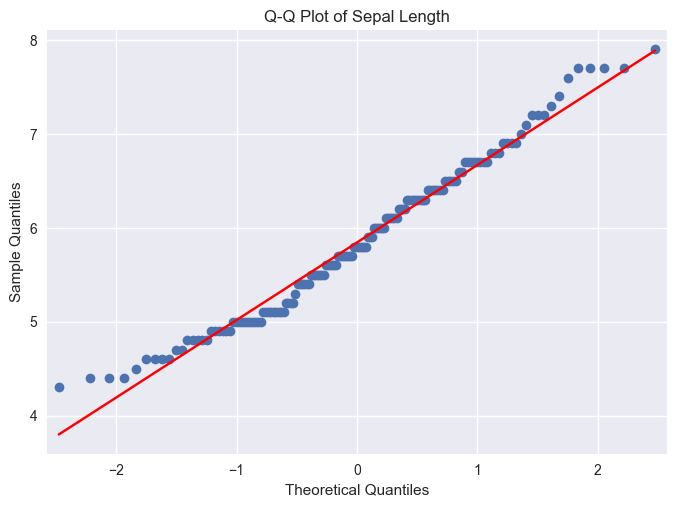

In [12]:
# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(sepal_length)
print(f"Shapiro-Wilk Test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

# Q-Q plot
qqplot(sepal_length, line='s')
plt.title('Q-Q Plot of Sepal Length')
plt.show()

## Challenge 3: CLT with Different Sample Statistics


The Central Limit Theorem applies not only to sample means but also to other
statistics like medians, variances, and proportions. Let's explore this concept.


In [13]:
# Load Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

# Display of the Boston Housing dataset:
boston_df.head()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
#Summary statistics for housing prices (MEDV):
boston_df['MEDV'].describe()

In [ ]:
# Let's focus on housing prices (MEDV)
housing_prices = boston_df['MEDV'].values

# Create a binary variable: 1 if price > median, 0 otherwise
median_price = np.median(housing_prices)
housing_binary = (housing_prices > median_price).astype(int)

In [ ]:
# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(housing_prices, bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.axvline(np.mean(housing_prices), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(housing_prices):.2f}')
plt.axvline(np.median(housing_prices), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(housing_prices):.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(housing_binary, bins=2, alpha=0.7, color='salmon')
plt.title('Binary Housing Prices (Above/Below Median)')
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.ylabel('Frequency')
plt.show()

Your Tasks:
1. Implement sampling to examine the CLT's application to three different statistics:
   a) Sample means
   b) Sample medians
   c) Sample proportions (of houses above median price)
2. For each statistic, draw 1000 samples of size 30 and plot the distribution of the sample statistics
3. Compare the shapes of these three distributions
4. Discuss whether the CLT applies equally well to all three statistics.


In [14]:
# ImportError: 
# `load_boston` has been removed from scikit-learn since version 1.2.

# The Boston housing prices dataset has an ethical problem: as
# investigated in [1], the authors of this dataset engineered a
# non-invertible variable "B" assuming that racial self-segregation had a
# positive impact on house prices [2]. Furthermore the goal of the
# research that led to the creation of this dataset was to study the
# impact of air quality but it did not give adequate demonstration of the
# validity of this assumption.

## Challenge 4: Testing for Normality - Visual Methods

Before applying tests that assume normality, it's important to check if data
follows a normal distribution. Let's explore visual methods first.


In [16]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

print("Preview of the California Housing dataset:")
display(california_df.head())

Preview of the California Housing dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
print("\nSummary statistics for median income:")
print(california_df['MedInc'].describe())


Summary statistics for median income:
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64


In [18]:
# We'll focus on median income for this challenge
median_income = california_df['MedInc'].values


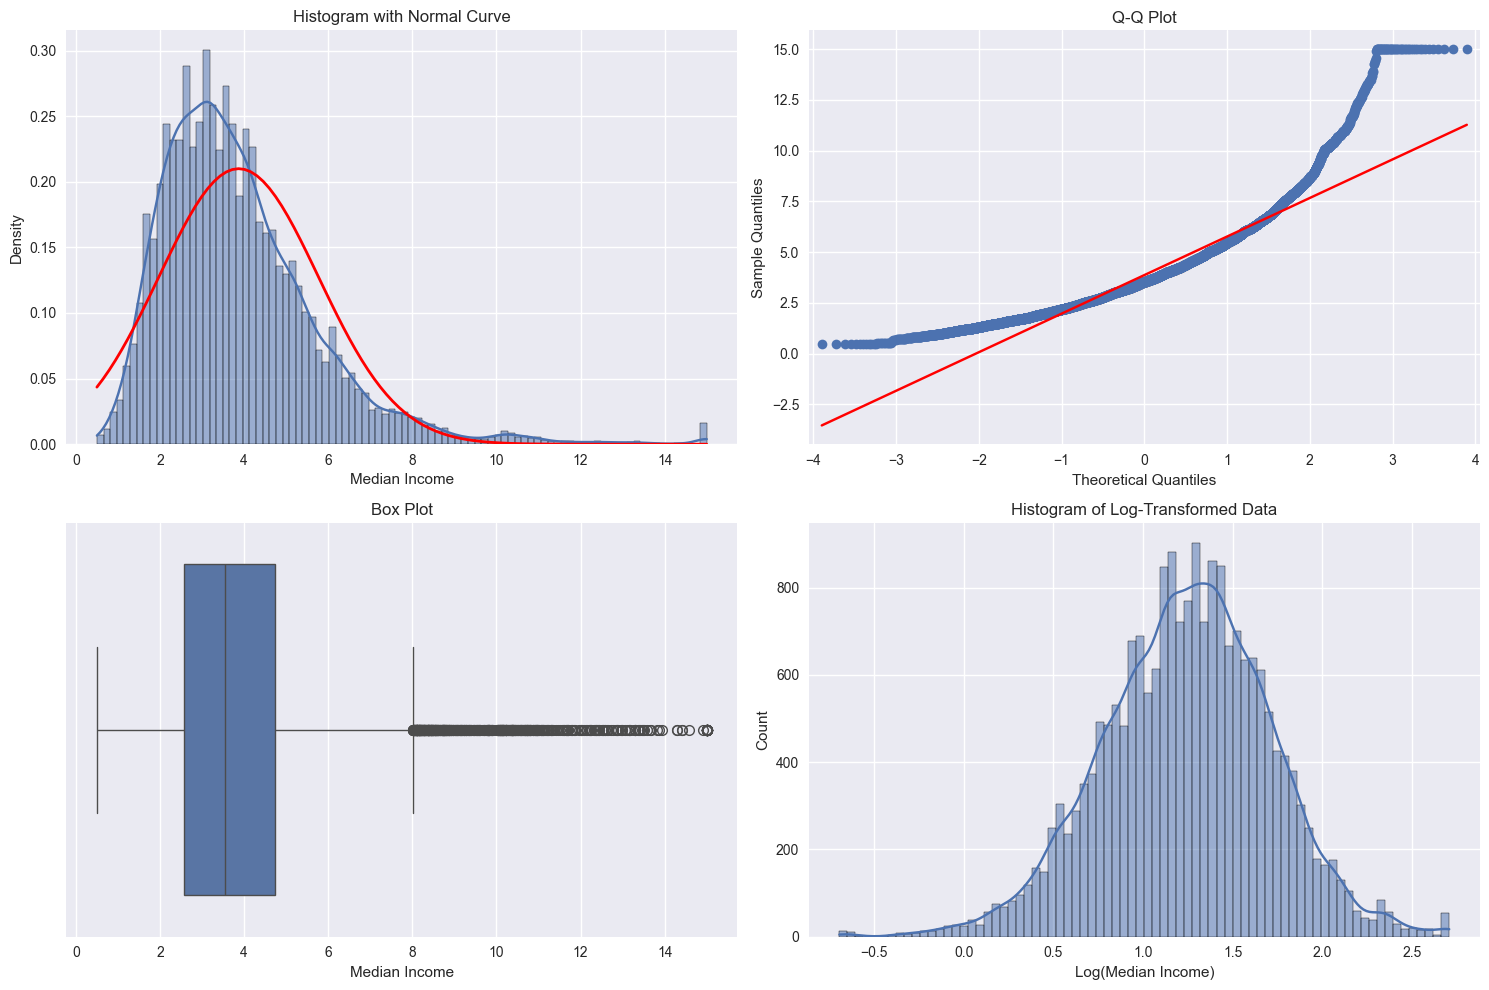

In [19]:
# Create some visualizations for normality assessment
plt.figure(figsize=(15, 10))

# Histogram with normal curve overlay
plt.subplot(2, 2, 1)
sns.histplot(median_income, kde=True, stat="density")
# Add theoretical normal curve
x = np.linspace(min(median_income), max(median_income), 100)
y = stats.norm.pdf(x, np.mean(median_income), np.std(median_income))
plt.plot(x, y, 'r-', linewidth=2)
plt.title('Histogram with Normal Curve')
plt.xlabel('Median Income')

# Q-Q plot
plt.subplot(2, 2, 2)
qqplot(median_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=median_income)
plt.title('Box Plot')
plt.xlabel('Median Income')

# Log-transformed histogram
plt.subplot(2, 2, 4)
sns.histplot(np.log(median_income), kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log(Median Income)')

plt.tight_layout()
plt.show()

Your Tasks:
1. Interpret the four plots above. What do they tell you about the normality of the data?
2. Create at least two additional visualizations to assess normality
3. Discuss whether a transformation might help make the data more normal
4. Apply your chosen transformation and re-assess normality
5. When would it be important to have normally distributed data in statistical analysis?

After using Visualizations to assess normality:

6.  Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not
7. Make sure you apply the statistical test on both the original and transformed data.

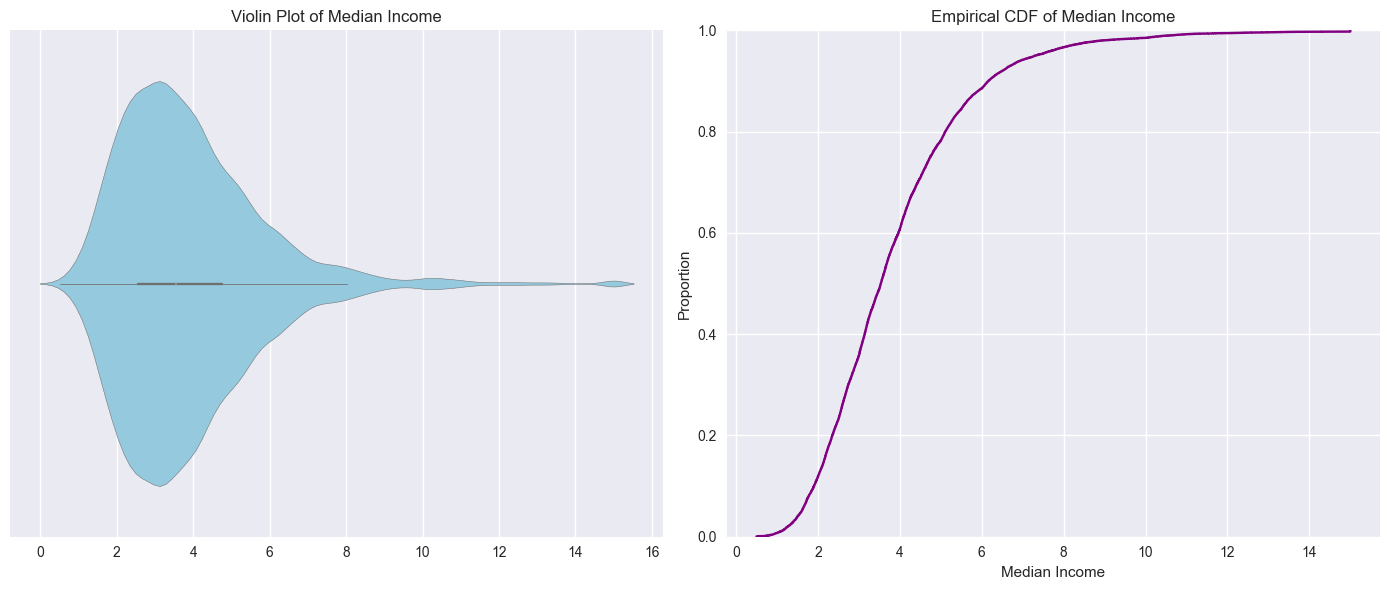

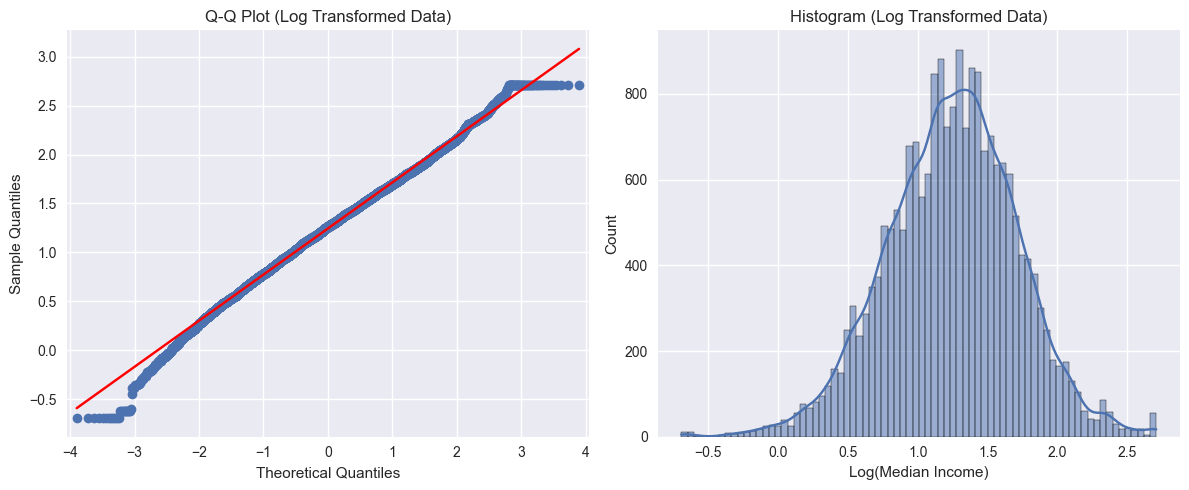

Shapiro-Wilk Test:
Original Data: statistic=0.8931, p-value=2.4793e-50
Log-Transformed: statistic=0.9970, p-value=1.8337e-08

D’Agostino and Pearson’s Test:
Original Data: statistic=7083.2038, p-value=0.0000e+00
Log-Transformed: statistic=166.1735, p-value=8.2393e-37


In [21]:
# --- Additional Visualizations ---

plt.figure(figsize=(14, 6))

# Violin plot
plt.subplot(1, 2, 1)
sns.violinplot(x=median_income, color='skyblue')
plt.title('Violin Plot of Median Income')

# Empirical CDF
plt.subplot(1, 2, 2)
sns.ecdfplot(median_income, color='purple')
plt.title('Empirical CDF of Median Income')
plt.xlabel('Median Income')

plt.tight_layout()
plt.show()


# --- Apply Transformation ---
log_income = np.log(median_income)

# Re-plot Q-Q plot and Histogram for transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
qqplot(log_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot (Log Transformed Data)')

plt.subplot(1, 2, 2)
sns.histplot(log_income, kde=True)
plt.title('Histogram (Log Transformed Data)')
plt.xlabel('Log(Median Income)')

plt.tight_layout()
plt.show()


# --- Statistical Normality Tests ---

# Shapiro-Wilk test on a subset (recommended for large N)
sample_income = np.random.choice(median_income, size=5000, replace=False)
sample_log_income = np.random.choice(log_income, size=5000, replace=False)

shapiro_original = stats.shapiro(sample_income)
shapiro_log = stats.shapiro(sample_log_income)

# D’Agostino and Pearson’s test
dagostino_original = stats.normaltest(median_income)
dagostino_log = stats.normaltest(log_income)

# Display results
print("Shapiro-Wilk Test:")
print(f"Original Data: statistic={shapiro_original.statistic:.4f}, p-value={shapiro_original.pvalue:.4e}")
print(f"Log-Transformed: statistic={shapiro_log.statistic:.4f}, p-value={shapiro_log.pvalue:.4e}\n")

print("D’Agostino and Pearson’s Test:")
print(f"Original Data: statistic={dagostino_original.statistic:.4f}, p-value={dagostino_original.pvalue:.4e}")
print(f"Log-Transformed: statistic={dagostino_log.statistic:.4f}, p-value={dagostino_log.pvalue:.4e}")

### Summary:

#### 1. Interpretation of Plots:
- **Histogram with Normal Curve**: The data is **right-skewed** and doesn't follow a normal distribution.
- **Q-Q Plot**: Points deviate from the diagonal, indicating **non-normality**.
- **Box Plot**: Shows **skewness** with a longer right tail.
- **Log-transformed Histogram**: The transformation helps reduce skew, but the data is still slightly non-normal.

#### 3. Transformation Discussion:
- **Log Transformation**: Reduces skew and makes the data closer to normal, though not perfect. This transformation can improve the performance of certain statistical models.

#### 5. Importance of Normality:
- **Normality Matters**: Many statistical tests (e.g., t-tests) assume normality. Non-normal data can lead to inaccurate results. Transformations like log or non-parametric tests are used when normality is not met.